In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [56]:
import rasterio
from rasterio.plot import show

In [57]:
# Read the shapefiles
gdf_faults = gpd.read_file('../data/faults/texas_faults_fromDor/texas_faults.shp')

In [58]:
gdf_rem_v1 = gpd.read_file('../data/output_rem_data/v3/buffaloBayouRegionalV1_USGS10m_river_pts.shp')

<AxesSubplot:>

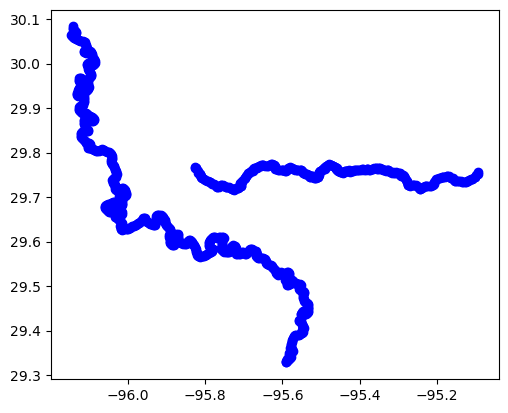

In [59]:
fig, ax = plt.subplots(1, 1)
gdf_rem_v1.plot(ax=ax, color='blue')

<AxesSubplot:>

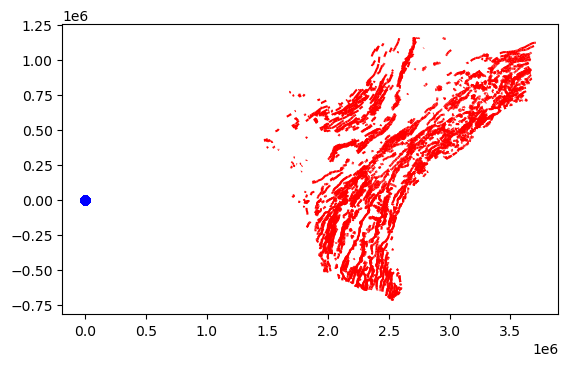

In [60]:
# Visualize the shapefiles
fig, ax = plt.subplots(1, 1)
gdf_faults.plot(ax=ax, color='red')
gdf_rem_v1.plot(ax=ax, color='blue')

/Users/justingosses/opt/miniconda3/envs/river-dem/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


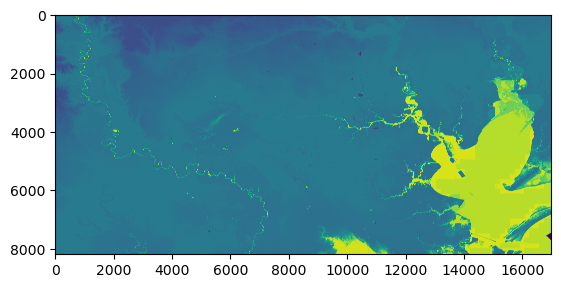

In [61]:
# Load the TIFF
with rasterio.open('../data/output_rem_data/v3/buffaloBayouRegionalV1_USGS10m_hillshade-color.tif') as src:
    img = src.read(1)  # read the first band

# Load the shapefile
gdf = gpd.read_file('../data/faults/texas_faults_fromDor/texas_faults.shp')

# Clip the shapefile to the extent of the TIFF
gdf = gdf.cx[src.bounds.left:src.bounds.right, src.bounds.bottom:src.bounds.top]

# Plot the TIFF
fig, ax = plt.subplots(1, 1)
show(img, ax=ax)

# Overlay the shapefile
gdf.plot(ax=ax, color='none', edgecolor='red')

plt.show()

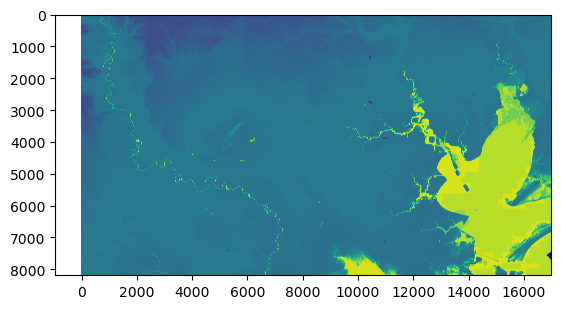

In [62]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Load the TIFF
with rasterio.open('../data/output_rem_data/v3/buffaloBayouRegionalV1_USGS10m_hillshade-color.tif') as src:
    img = src.read(1)  # read the first band
    tiff_crs = src.crs

# Load the shapefile
gdf = gpd.read_file('../data/faults/texas_faults_fromDor/texas_faults.shp')

# Check if the CRS of the shapefile matches the CRS of the TIFF
if gdf.crs != tiff_crs:
    gdf = gdf.to_crs(tiff_crs)

# Clip the shapefile to the extent of the TIFF
gdf = gdf.cx[src.bounds.left:src.bounds.right, src.bounds.bottom:src.bounds.top]

# Plot the TIFF
fig, ax = plt.subplots(1, 1)
show(img, ax=ax)

# Overlay the shapefile
gdf.plot(ax=ax, color='none', edgecolor='red')

plt.show()

In [63]:
from pyproj import CRS

# Load the CRS from the .prj file
crs_faults = CRS.from_file('../data/faults/texas_faults_fromDor/texas_faults.prj')

# Print the CRS
print(crs_faults)

AttributeError: type object 'CRS' has no attribute 'from_file'

In [ ]:
from osgeo import osr

# Open the .prj file
with open('../data/faults/texas_faults_fromDor/texas_faults.prj', 'r') as f:
    prj_txt = f.read()

# Create a SpatialReference object
srs = osr.SpatialReference()

# Import the prj contents into the SpatialReference object
srs.ImportFromWkt(prj_txt)

# Print the CRS
print(srs)

PROJCS["Texas South Central 4204",
    GEOGCS["NAD27 Coordinate System",
        DATUM["D_North American Datum 1927 (NAD27)",
            SPHEROID["Clarke 1866",6378206.4,294.9786982,
                AUTHORITY["EPSG","7008"]]],
        PRIMEM["Greenwich",0],
        UNIT["Degree",0.0174532925199433]],
    PROJECTION["Lambert_Conformal_Conic_2SP"],
    PARAMETER["latitude_of_origin",27.833333333333],
    PARAMETER["central_meridian",-99],
    PARAMETER["standard_parallel_1",28.383333333333],
    PARAMETER["standard_parallel_2",30.283333333333],
    PARAMETER["false_easting",2000000],
    PARAMETER["false_northing",0],
    UNIT["US survey foot",0.304800609601219,
        AUTHORITY["EPSG","9003"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH]]


In [ ]:
# Load the shapefile
gdf = gpd.read_file('../data/faults/texas_faults_fromDor/texas_faults.shp')

# Reproject the CRS to EPSG:4326
gdf_faults  = gdf.to_crs('EPSG:4269')

<AxesSubplot:>

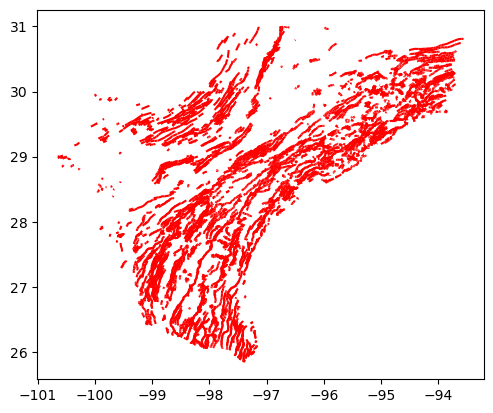

In [ ]:
# Visualize the shapefiles
fig, ax = plt.subplots(1, 1)
gdf_faults.plot(ax=ax, color='red')

tiff_crs EPSG:4269


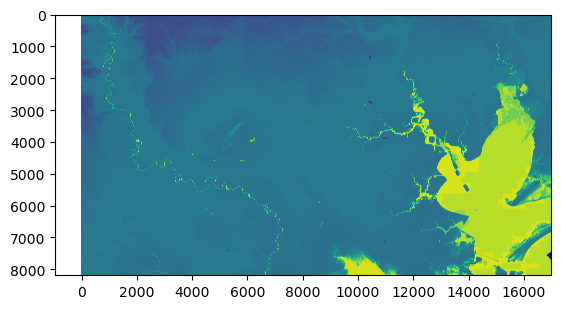

In [ ]:
# Load the TIFF
with rasterio.open('../data/output_rem_data/v3/buffaloBayouRegionalV1_USGS10m_hillshade-color.tif') as src:
    img = src.read(1)  # read the first band
    tiff_crs = src.crs
    print("tiff_crs", tiff_crs)
# Load the shapefile
#gdf_faults = gdf 

# Check if the CRS of the shapefile matches the CRS of the TIFF
if gdf_faults.crs != tiff_crs:
    gdf_faults = gdf_faults.to_crs(tiff_crs)

# Clip the shapefile to the extent of the TIFF
gdf_faults = gdf_faults.cx[src.bounds.left:src.bounds.right, src.bounds.bottom:src.bounds.top]

# Plot the TIFF
fig, ax = plt.subplots(1, 1)
show(img, ax=ax)

# Overlay the shapefile
gdf_faults.plot(ax=ax, color='none', edgecolor='red')

plt.show()

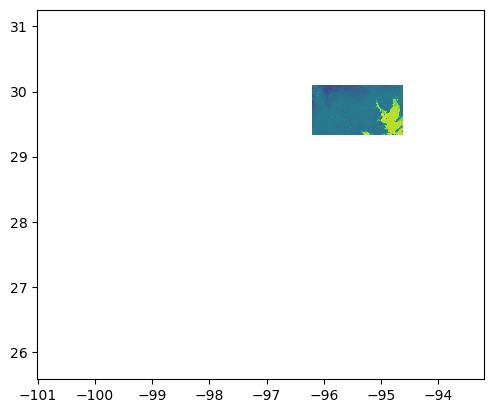

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show
import matplotlib.pyplot as plt

# Load the shapefile and reproject it to EPSG:4326
gdf_faults = gpd.read_file('../data/faults/texas_faults_fromDor/texas_faults.shp')
gdf_faults = gdf_faults.to_crs('EPSG:4326')

# Load the TIFF
with rasterio.open('../data/output_rem_data/v3/buffaloBayouRegionalV1_USGS10m_hillshade-color.tif') as src:
    # Calculate the transform and the dimensions for the new CRS
    transform, width, height = calculate_default_transform(src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)

    # Create a new raster for the reprojected TIFF
    with rasterio.open('reprojected.tif', 'w', driver='GTiff', height=height, width=width, count=1, dtype=src.dtypes[0], crs='EPSG:4326', transform=transform) as reprojected:
        # Reproject the TIFF to EPSG:4326
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(reprojected, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs='EPSG:4326',
            resampling=Resampling.nearest)

# Load the reprojected TIFF
with rasterio.open('reprojected.tif') as reprojected:
    img = reprojected.read(1)

# Plot the reprojected TIFF
fig, ax = plt.subplots(1, 1)
show(img, ax=ax, transform=transform)

# Overlay the reprojected shapefile
gdf_faults.plot(ax=ax, color='none', edgecolor='red')

plt.show()

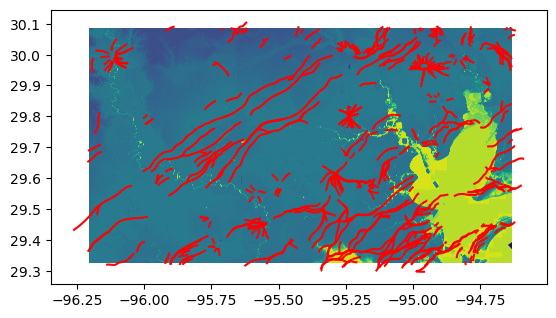

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show
import matplotlib.pyplot as plt

# Load the shapefile and reproject it to EPSG:4326
gdf_faults = gpd.read_file('../data/faults/texas_faults_fromDor/texas_faults.shp')
gdf_faults = gdf_faults.to_crs('EPSG:4326')

# Load the TIFF
with rasterio.open('../data/output_rem_data/v3/buffaloBayouRegionalV1_USGS10m_hillshade-color.tif') as src:
    # Calculate the transform and the dimensions for the new CRS
    transform, width, height = calculate_default_transform(src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)

    # Create a new raster for the reprojected TIFF
    with rasterio.open('reprojected.tif', 'w', driver='GTiff', height=height, width=width, count=1, dtype=src.dtypes[0], crs='EPSG:4326', transform=transform) as reprojected:
        # Reproject the TIFF to EPSG:4326
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(reprojected, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs='EPSG:4326',
            resampling=Resampling.nearest)

# Load the reprojected TIFF
with rasterio.open('reprojected.tif') as reprojected:
    img = reprojected.read(1)

    # Clip the reprojected shapefile to the extent of the reprojected TIFF
    gdf_faults = gdf_faults.cx[reprojected.bounds.left:reprojected.bounds.right, reprojected.bounds.bottom:reprojected.bounds.top]

# Plot the reprojected TIFF
fig, ax = plt.subplots(1, 1)
show(img, ax=ax, transform=transform)

# Overlay the reprojected and clipped shapefile
gdf_faults.plot(ax=ax, color='red', edgecolor='red')

# Load the GeoJSON file
gdf_geojson = gpd.read_file('../data/buffaloBayouTestGeojson.geojson')

# Reproject the GeoJSON to EPSG:4326
gdf_geojson = gdf_geojson.to_crs('EPSG:4326')


plt.show()

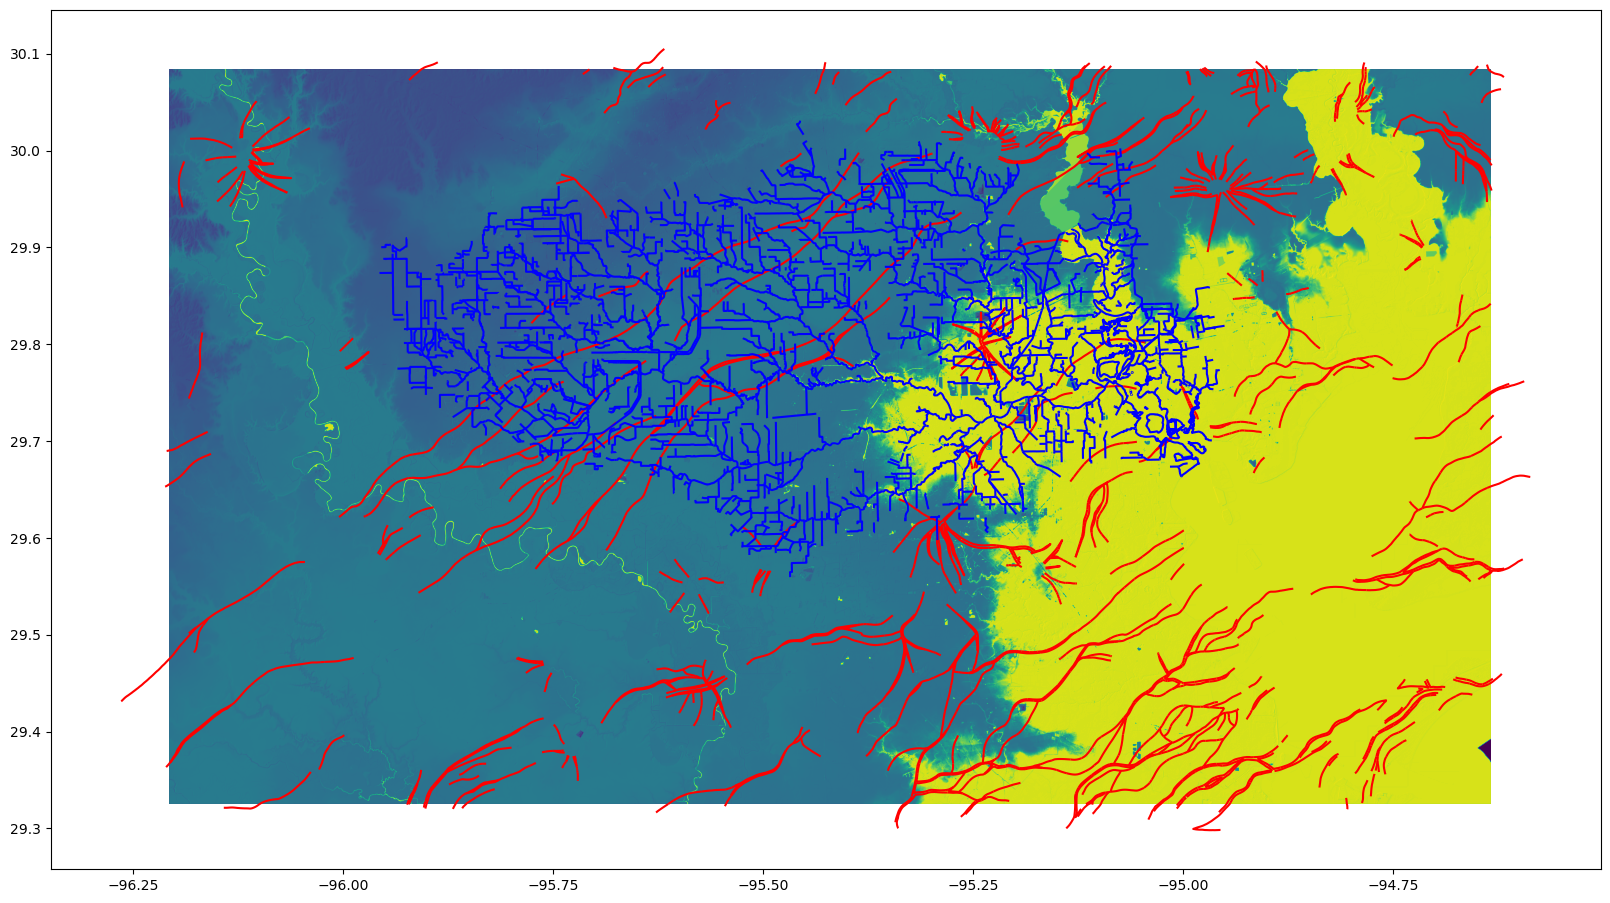

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show
import matplotlib.pyplot as plt

# Load the shapefile and reproject it to EPSG:4326
gdf_faults = gpd.read_file('../data/faults/texas_faults_fromDor/texas_faults.shp')
gdf_faults = gdf_faults.to_crs('EPSG:4326')

# Load the second shapefile and reproject it to EPSG:4326
gdf_nhda = gpd.read_file('../data/rivers_NHD/Shape/NHDFlowline.shp') #python_data_processing/data/rivers_NHD/Shape/NHDWaterbody.shp
gdf_nhda = gdf_nhda.to_crs('EPSG:4326')

# Load the TIFF
with rasterio.open('../data/output_rem_data/v1/buffaloBayouRegionalV1_USGS10m_hillshade-color.tif') as src:
    # Calculate the transform and the dimensions for the new CRS
    transform, width, height = calculate_default_transform(src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)

    # Create a new raster for the reprojected TIFF
    with rasterio.open('reprojected.tif', 'w', driver='GTiff', height=height, width=width, count=1, dtype=src.dtypes[0], crs='EPSG:4326', transform=transform) as reprojected:
        # Reproject the TIFF to EPSG:4326
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(reprojected, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs='EPSG:4326',
            resampling=Resampling.nearest)

# Load the reprojected TIFF
with rasterio.open('reprojected.tif') as reprojected:
    img = reprojected.read(1)

    # Clip the reprojected shapefile to the extent of the reprojected TIFF
    gdf_faults = gdf_faults.cx[reprojected.bounds.left:reprojected.bounds.right, reprojected.bounds.bottom:reprojected.bounds.top]
    gdf_nhda = gdf_nhda.cx[reprojected.bounds.left:reprojected.bounds.right, reprojected.bounds.bottom:reprojected.bounds.top]


# Plot the reprojected TIFF
fig, ax = plt.subplots(1, 1, figsize=(20, 20))  # Adjust the size as needed
show(img, ax=ax, transform=transform)

# Overlay the reprojected and clipped shapefile
gdf_faults.plot(ax=ax, color='red', edgecolor='red')
gdf_nhda.plot(ax=ax, color='blue', edgecolor='blue')

plt.show()

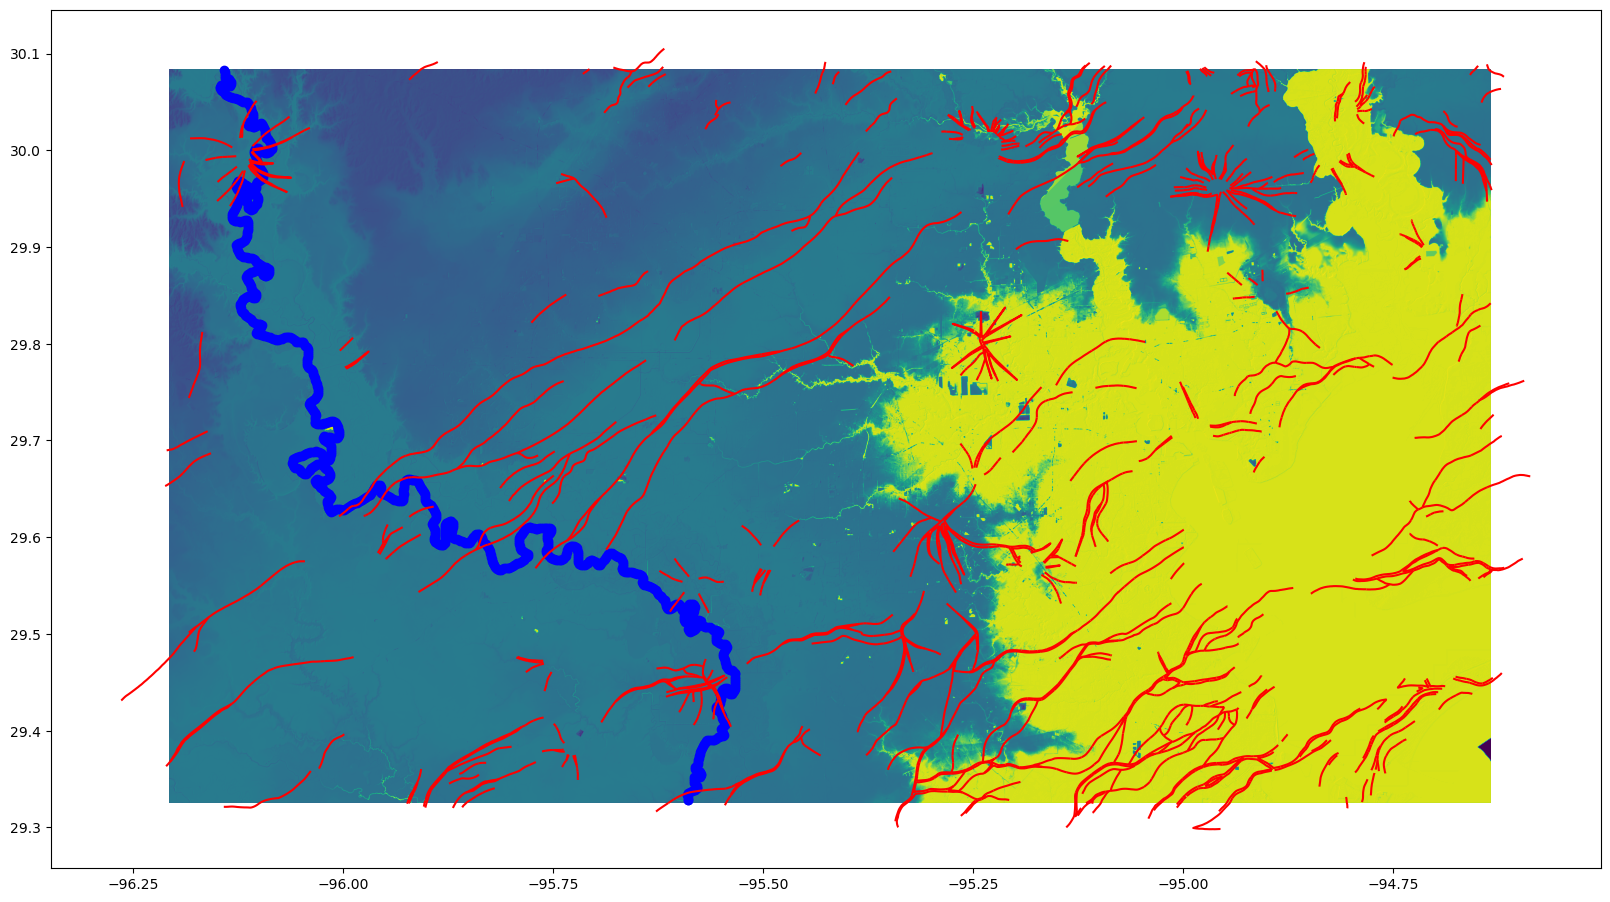

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show
import matplotlib.pyplot as plt

# Load the shapefile and reproject it to EPSG:4326
gdf_faults = gpd.read_file('../data/faults/texas_faults_fromDor/texas_faults.shp')
gdf_faults = gdf_faults.to_crs('EPSG:4326')

# Load the second shapefile and reproject it to EPSG:4326
gdf_nhda = gpd.read_file('../data/output_rem_data/v1/buffaloBayouRegionalV1_USGS10m_river_pts.shp') #python_data_processing/data/rivers_NHD/Shape/NHDWaterbody.shp
gdf_nhda = gdf_nhda.to_crs('EPSG:4326')

# Load the TIFF
with rasterio.open('../data/output_rem_data/v1/buffaloBayouRegionalV1_USGS10m_hillshade-color.tif') as src:
    # Calculate the transform and the dimensions for the new CRS
    transform, width, height = calculate_default_transform(src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)

    # Create a new raster for the reprojected TIFF
    with rasterio.open('reprojected.tif', 'w', driver='GTiff', height=height, width=width, count=1, dtype=src.dtypes[0], crs='EPSG:4326', transform=transform) as reprojected:
        # Reproject the TIFF to EPSG:4326
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(reprojected, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs='EPSG:4326',
            resampling=Resampling.nearest)

# Load the reprojected TIFF
with rasterio.open('reprojected.tif') as reprojected:
    img = reprojected.read(1)

    # Clip the reprojected shapefile to the extent of the reprojected TIFF
    gdf_faults = gdf_faults.cx[reprojected.bounds.left:reprojected.bounds.right, reprojected.bounds.bottom:reprojected.bounds.top]
    gdf_nhda = gdf_nhda.cx[reprojected.bounds.left:reprojected.bounds.right, reprojected.bounds.bottom:reprojected.bounds.top]


# Plot the reprojected TIFF
fig, ax = plt.subplots(1, 1, figsize=(20, 20))  # Adjust the size as needed
show(img, ax=ax, transform=transform)

# Overlay the reprojected and clipped shapefile
gdf_faults.plot(ax=ax, color='red', edgecolor='red')
gdf_nhda.plot(ax=ax, color='blue', edgecolor='blue')

plt.show()

In [ ]:
import os

In [ ]:
# data_folder_path = "../"
# dataFolderName = "data/rivers_NHD/Shape/"
# data_folder_path = os.path.join(data_folder_path,dataFolderName)
# print(data_folder_path)
# file_path_unzipped_rivers_NHD = os.path.join(data_folder_path,"NHDFlowline.shp")
# file_path_rivers_NHD_shapeFile = os.path.join(file_path_unzipped_rivers_NHD,"Shape","../data/rivers_NHD/Shape/NHDFlowline.shp")

../data/rivers_NHD/Shape/


In [ ]:
shapefile = gpd.read_file('../data/rivers_NHD/Shape/NHDFlowline.shp')
print(type(shapefile))
print(shapefile)

<class 'geopandas.geodataframe.GeoDataFrame'>
     permanent_       fdate  resolution   gnis_id              gnis_name  \
0     113253061  2012-01-04           2      None                   None   
1     109566003  2012-01-04           2      None                   None   
2     113254783  2012-01-04           2  01373919           Greens Bayou   
3     113255589  2012-01-04           2      None                   None   
4     113255303  2012-01-04           2      None                   None   
...         ...         ...         ...       ...                    ...   
2877  113251823  2012-01-04           2      None                   None   
2878  113252195  2012-01-04           2      None                   None   
2879  113254411  2012-01-04           2      None                   None   
2880  113253935  2012-01-04           2  01374616  Little Whiteoak Bayou   
2881  113255137  2014-12-05           2      None                   None   

      lengthkm       reachcode  flowdir w

In [ ]:
test = shapefile[shapefile['gnis_name']!='Buffalo Bayou 3452']

In [ ]:
test['gnis_name'].unique()

array([None, 'Greens Bayou', 'Sims Bayou', 'West Canal', 'Langham Creek',
       'Bear Creek', 'Cotton Patch Bayou', 'Brays Bayou', 'Buffalo Bayou',
       'Garners Bayou', 'Whiteoak Bayou', 'Carpenters Bayou',
       'Willow Fork', 'Spring Branch', 'South Mayde Creek', 'Plum Creek',
       'Snake Creek', 'Little Prong', 'Vince Bayou', 'Briar Branch',
       'Vogel Creek', 'Bering Ditch', 'Mason Creek', 'Berry Bayou',
       'Little Whiteoak Bayou', 'Halls Bayou', 'Rummel Creek',
       'Horsepen Creek', 'Goose Creek', 'Hunting Bayou', 'Patrick Bayou',
       'Keegans Bayou', 'San Jacinto River Authority Canal',
       'San Jacinto River', 'Willow Waterhole Bayou', 'Cole Creek',
       'East Fork Patrick Bayou', 'Cane Island Branch', 'Turkey Creek',
       'Tucker Bayou', 'Country Club Bayou', 'Reinhardt Bayou',
       'Jackson Bayou', 'Dinner Creek', 'Williams Gully', 'Berry Creek',
       'Panther Creek', 'Rolling Fork', 'West Fork Goose Creek',
       'Little Vince Bayou', 'Boggy Ba

In [ ]:
geodf_buffaloBayou = shapefile[shapefile['gnis_name']=='Buffalo Bayou']

In [ ]:
geodf_buffaloBayou.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [ ]:
geodf_buffaloBayou.length

/var/folders/ry/tr7t3nh122z_0n6rz2cl3lv40000gn/T/ipykernel_25895/724724451.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geodf_buffaloBayou.length


47      0.003579
89      0.001425
136     0.003018
180     0.016738
197     0.006626
          ...   
2801    0.010228
2804    0.009728
2813    0.027208
2829    0.005220
2862    0.011094
Length: 76, dtype: float64

In [ ]:
geodf_buffaloBayou 

permanent_       fdate  resolution   gnis_id      gnis_name  lengthkm  \
47    113254399  2012-01-04           2  01372802  Buffalo Bayou     0.359   
89    113254947  2012-01-04           2  01372802  Buffalo Bayou     0.139   
136   113254689  2012-01-04           2  01372802  Buffalo Bayou     0.329   
180   113254937  2012-01-04           2  01372802  Buffalo Bayou     1.728   
197   113254431  2012-01-04           2  01372802  Buffalo Bayou     0.665   
...         ...         ...         ...       ...            ...       ...   
2801  113254657  2012-01-04           2  01372802  Buffalo Bayou     1.044   
2804  113254557  2012-01-04           2  01372802  Buffalo Bayou     1.003   
2813  113254585  2012-01-04           2  01372802  Buffalo Bayou     2.711   
2829  113254619  2012-01-04           2  01372802  Buffalo Bayou     0.531   
2862  113254873  2012-01-04           2  01372802  Buffalo Bayou     1.077   

           reachcode  flowdir wbarea_per  ftype  fcode  mainpath  innetwork  \
47    12040104000055        1       None    460  46006         0          1   
89    12040104002441        1  120007513    558  55800         0          1   
136   12040104000080        1       None    460  46006         0          1   
180   12040104000073        1       None    460  46006         0          1   
197   12040104000053        1       None    460  46006         0          1   
...              ...      ...        ...    ...    ...       ...        ...   
2801  12040104000057        1  120007515    558  55800         0          1   
2804  12040104000080        1       None    460  46006         0          1   
2813  12040104000050        1  120007513    558  55800         0          1   
2829  12040104002363        1  120007515    558  55800         0          1   
2862  12040104000033        1  120007513    558  55800         0          1   

      visibility  SHAPE_Leng  Enabled  ObjectID  \
47       5000000    0.003579        1        48   
89       5000000    0.001425        1        90   
136       500000    0.003018        1       137   
180      5000000    0.016738        1       181   
197      5000000    0.006626        1       198   
...          ...         ...      ...       ...   
2801     5000000    0.010228        1      2802   
2804      500000    0.009728        1      2805   
2813     5000000    0.027208        1      2814   
2829     5000000    0.005220        1      2830   
2862     5000000    0.011094        1      2863   

                                               geometry  
47    LINESTRING Z (-95.48178 29.77218 0.00000, -95....  
89    LINESTRING Z (-95.11023 29.74014 0.00000, -95....  
136   LINESTRING Z (-95.81983 29.76034 0.00000, -95....  
180   LINESTRING Z (-95.69676 29.74392 0.00000, -95....  
197   LINESTRING Z (-95.47409 29.77213 0.00000, -95....  
...                                                 ...  
2801  LINESTRING Z (-95.55876 29.76194 0.00000, -95....  
2804  LINESTRING Z (-95.82575 29.76794 0.00000, -95....  
2813  LINESTRING Z (-95.38264 29.76386 0.00000, -95....  
2829  LINESTRING Z (-95.56271 29.76196 0.00000, -95....  
2862  LINESTRING Z (-95.18432 29.74563 0.00000, -95....  

[76 rows x 18 columns]

In [ ]:
geodf_buffaloBayouWithBuffer = geodf_buffaloBayou.copy()

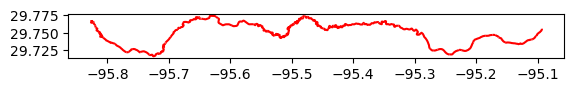

In [ ]:
fig, ax = plt.subplots()
geodf_buffaloBayouWithBuffer.plot(ax=ax, edgecolor="red");

In [ ]:

geodf_buffaloBayouWithBuffer.to_file("../data/BuffaloBayouLineFromNHDJoined.shp")


# Reproject to a projected CRS
geodf_buffaloBayouWithBuffer_EPSG32615 = geodf_buffaloBayouWithBuffer.to_crs("EPSG:32615")

# Save the GeoDataFrame as a shapefile
geodf_buffaloBayouWithBuffer_EPSG32615.to_file("../data/BuffaloBayouLineFromNHDJoined_EPSG32615.shp")

In [ ]:
### Now lets do both all rivers?

In [ ]:
geodf_AllRivers = shapefile

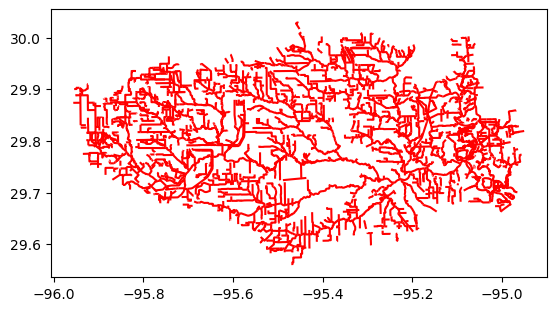

In [ ]:
fig, ax = plt.subplots()
geodf_AllRivers.plot(ax=ax, edgecolor="red");

In [ ]:
gdf_nhda.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#shapefile = gpd.read_file('../data/rivers_NHD/Shape/NHDFlowline.shp')
shapefile[shapefile['gnis_name']!='Buffalo Bayou 3452']
geodf_buffaloBayou = shapefile[shapefile['gnis_name']=='Buffalo Bayou']
geodf_buffaloBayou.to_crs('EPSG:4326')
geodf_buffaloBayou[0:2]

permanent_       fdate  resolution   gnis_id      gnis_name  lengthkm  \
47  113254399  2012-01-04           2  01372802  Buffalo Bayou     0.359   
89  113254947  2012-01-04           2  01372802  Buffalo Bayou     0.139   

         reachcode  flowdir wbarea_per  ftype  fcode  mainpath  innetwork  \
47  12040104000055        1       None    460  46006         0          1   
89  12040104002441        1  120007513    558  55800         0          1   

    visibility  SHAPE_Leng  Enabled  ObjectID  \
47     5000000    0.003579        1        48   
89     5000000    0.001425        1        90   

                                             geometry  
47  LINESTRING Z (-95.48178 29.77218 0.00000, -95....  
89  LINESTRING Z (-95.11023 29.74014 0.00000, -95....

In [ ]:
gdf_nhda

id                    geometry
0     1  POINT (-95.58979 29.32846)
1     1  POINT (-95.57883 29.34064)
2     1  POINT (-95.58065 29.33918)
3     1  POINT (-95.58283 29.33818)
4     1  POINT (-95.58517 29.33762)
..   ..                         ...
991   1  POINT (-95.82434 29.58160)
992   1  POINT (-95.82356 29.57960)
993   1  POINT (-95.82280 29.57759)
994   1  POINT (-95.82222 29.57552)
995   1  POINT (-95.82151 29.57350)

[996 rows x 2 columns]

In [ ]:
# Save rows with LineString geometries to a separate GeoDataFrame
gdf_nhda_lines = gdf_nhda[gdf_nhda.geometry.type != 'Point']
# Combine the GeoDataFrames
combined_gdf = gdf_nhda_lines.append(geodf_buffaloBayou)

# Save the combined GeoDataFrame as a shapefile
combined_gdf.to_file("../data/combined_BrazosBuffaloBayou.shp")

/var/folders/ry/tr7t3nh122z_0n6rz2cl3lv40000gn/T/ipykernel_25895/4122611672.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = gdf_nhda_lines.append(geodf_buffaloBayou)


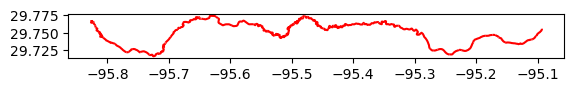

In [ ]:
fig, ax = plt.subplots()
combined_gdf.plot(ax=ax, edgecolor="red"); 

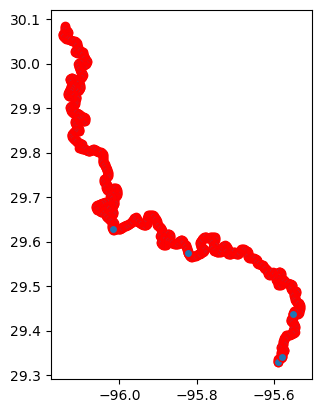

In [ ]:
fig, ax = plt.subplots()
gdf_nhda.plot(ax=ax, edgecolor="red"); 

In [ ]:
gdf_nhda

id                    geometry
0     1  POINT (-95.58979 29.32846)
1     1  POINT (-95.57883 29.34064)
2     1  POINT (-95.58065 29.33918)
3     1  POINT (-95.58283 29.33818)
4     1  POINT (-95.58517 29.33762)
..   ..                         ...
991   1  POINT (-95.82434 29.58160)
992   1  POINT (-95.82356 29.57960)
993   1  POINT (-95.82280 29.57759)
994   1  POINT (-95.82222 29.57552)
995   1  POINT (-95.82151 29.57350)

[996 rows x 2 columns]

<AxesSubplot:>

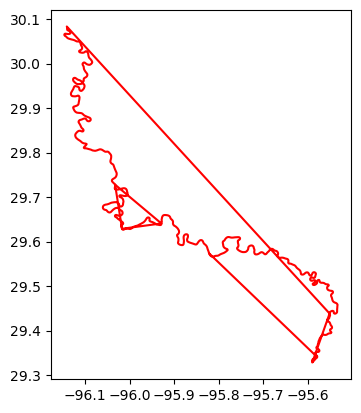

In [ ]:
from shapely.geometry import LineString

# Convert the points to a LineString
line = LineString(gdf_nhda.geometry.tolist())

# Create a new GeoDataFrame with the LineString
gdf_nhda_line = gpd.GeoDataFrame(geometry=[line])

# Plot the LineString
fig, ax = plt.subplots()
gdf_nhda_line.plot(ax=ax, edgecolor="red")

/var/folders/ry/tr7t3nh122z_0n6rz2cl3lv40000gn/T/ipykernel_25895/2194634201.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = gdf_nhda.geometry.distance(gdf_nhda.geometry.shift())


<AxesSubplot:>

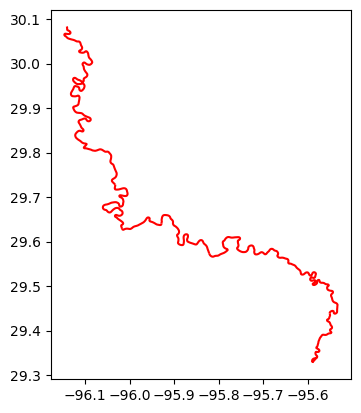

In [ ]:
from shapely.geometry import LineString

# # Reproject the data to EPSG:4326
gdf_nhda = gdf_nhda.to_crs(epsg=4326)

# Calculate the distance between consecutive points
distances = gdf_nhda.geometry.distance(gdf_nhda.geometry.shift())

# Set a distance threshold
threshold = 0.04  # replace with your desired threshold

# Create a list to store the points for each LineString
points = []
lines = []

# Iterate over the points and distances
for point, distance in zip(gdf_nhda.geometry, distances):
    # If the distance is less than the threshold, add the point to the current LineString
    if distance <= threshold:
        points.append(point)
    # If the distance is greater than the threshold, start a new LineString
    else:
        # Only add LineStrings with more than one point
        if len(points) > 1:
            lines.append(LineString(points))
        points = [point]

# Add the last LineString if it has more than one point
if len(points) > 1:
    lines.append(LineString(points))

# Create a new GeoDataFrame with the LineStrings
gdf_nhda_lines = gpd.GeoDataFrame(geometry=lines)


# Plot the LineStrings
fig, ax = plt.subplots()
gdf_nhda_lines.plot(ax=ax, edgecolor="red")

In [ ]:
geodf_buffaloBayou.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [ ]:
# Combine the GeoDataFrames
geodf_buffaloBayou.to_crs(epsg=4326)
combined_gdf = gdf_nhda_lines.append(geodf_buffaloBayou)

# Reproject the data to EPSG:4326
combined_gdf = combined_gdf.set_crs(epsg=4326)

# Save the combined GeoDataFrame as a shapefile
combined_gdf.to_file("../data/combined_BrazosBuffaloBayou.shp")

/var/folders/ry/tr7t3nh122z_0n6rz2cl3lv40000gn/T/ipykernel_25895/3808683421.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gdf = gdf_nhda_lines.append(geodf_buffaloBayou)


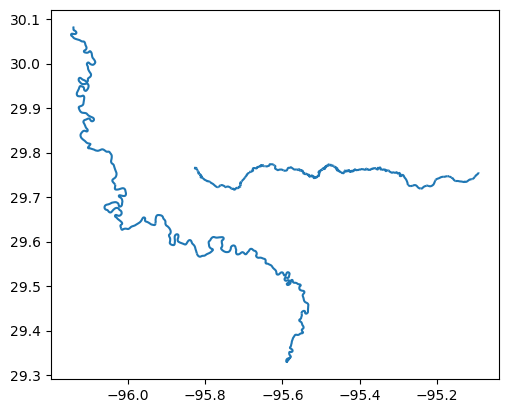

In [ ]:
import geopandas as gpd

import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = "../data/combined_BrazosBuffaloBayou.shp"
gdf = gpd.read_file(shapefile_path)

# Visualize the shapefile
gdf.plot()
plt.show()

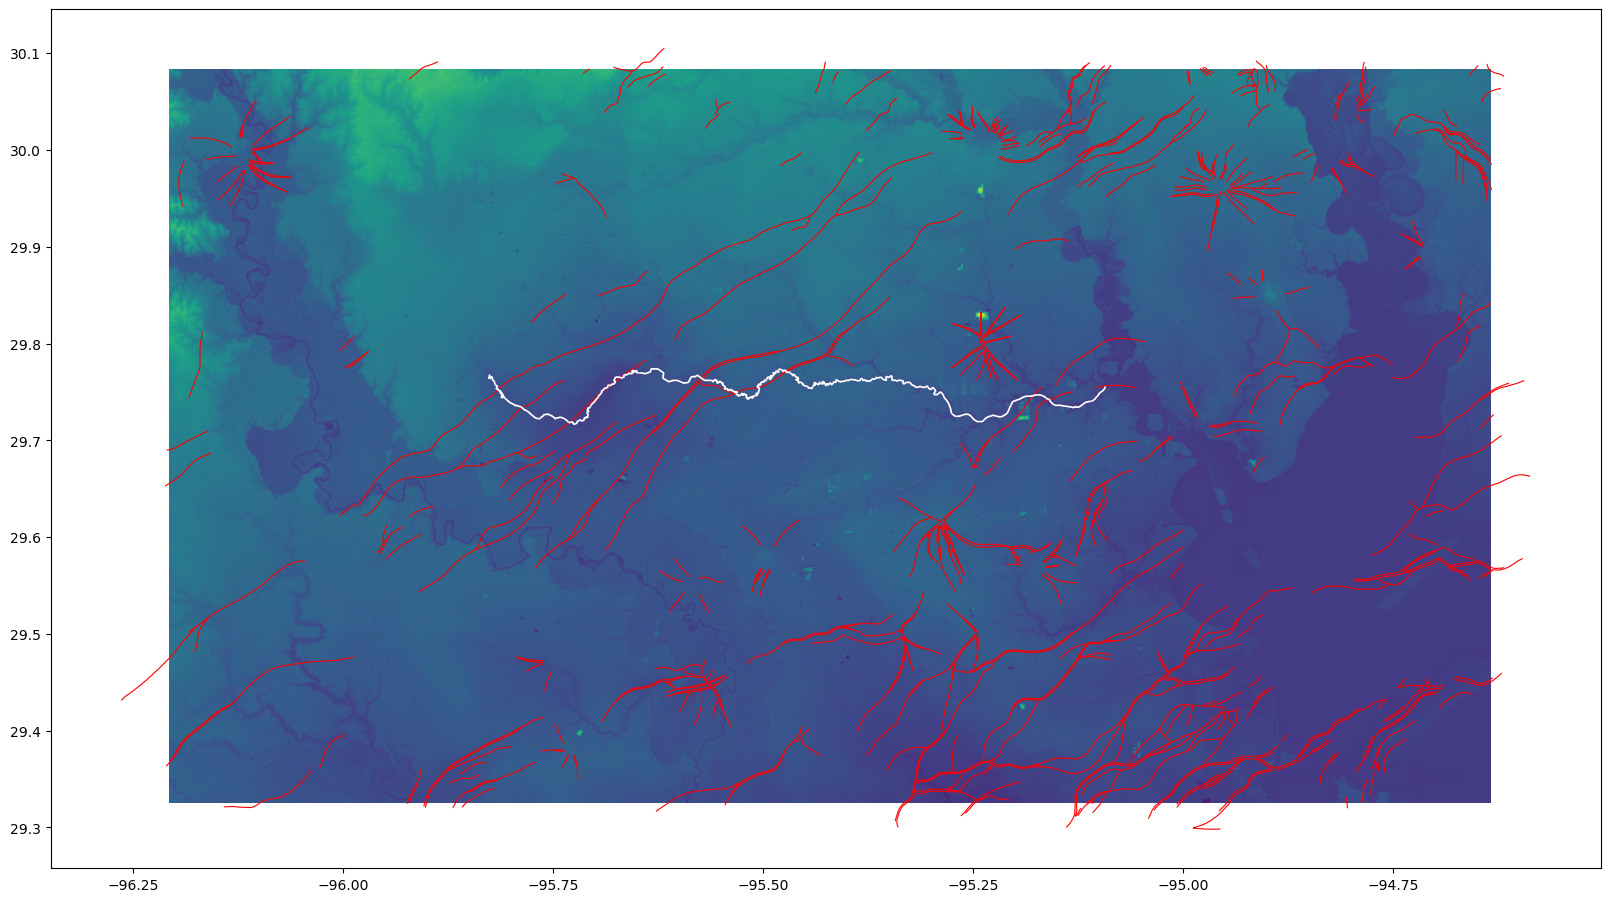

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show
import matplotlib.pyplot as plt

# Load the shapefile and reproject it to EPSG:4326
gdf_faults = gpd.read_file('../data/faults/texas_faults_fromDor/texas_faults.shp')
gdf_faults = gdf_faults.to_crs('EPSG:4326')

# Load the second shapefile and reproject it to EPSG:4326
# gdf_nhda = gpd.read_file('../data/output_rem_data/v1/buffaloBayouRegionalV1_USGS10m_river_pts.shp') #python_data_processing/data/rivers_NHD/Shape/NHDWaterbody.shp
# gdf_nhda = gdf_nhda.to_crs('EPSG:4326')

shapefile = gpd.read_file('../data/rivers_NHD/Shape/NHDFlowline.shp')
shapefile[shapefile['gnis_name']!='Buffalo Bayou 3452']
geodf_buffaloBayou = shapefile[shapefile['gnis_name']=='Buffalo Bayou']
geodf_buffaloBayou.to_crs('EPSG:4326')

# Load the TIFF
with rasterio.open('../data/output_rem_data/v3/buffaloBayouRegionalV1_USGS10m_REM.tif') as src:
    # Calculate the transform and the dimensions for the new CRS
    transform, width, height = calculate_default_transform(src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)

    # Create a new raster for the reprojected TIFF
    with rasterio.open('reprojected.tif', 'w', driver='GTiff', height=height, width=width, count=1, dtype=src.dtypes[0], crs='EPSG:4326', transform=transform) as reprojected:
        # Reproject the TIFF to EPSG:4326
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(reprojected, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs='EPSG:4326',
            resampling=Resampling.nearest)

# Load the reprojected TIFF
with rasterio.open('reprojected.tif') as reprojected:
    img = reprojected.read(1)

    # Clip the reprojected shapefile to the extent of the reprojected TIFF
    gdf_faults = gdf_faults.cx[reprojected.bounds.left:reprojected.bounds.right, reprojected.bounds.bottom:reprojected.bounds.top]
    geodf_buffaloBayou = geodf_buffaloBayou.cx[reprojected.bounds.left:reprojected.bounds.right, reprojected.bounds.bottom:reprojected.bounds.top]


# Plot the reprojected TIFF
fig, ax = plt.subplots(1, 1, figsize=(20, 20))  # Adjust the size as needed
show(img, ax=ax, transform=transform)

# Overlay the reprojected and clipped shapefile
gdf_faults.plot(ax=ax, color='red', edgecolor='red', linewidth=0.8)
geodf_buffaloBayou.plot(ax=ax, color='white', edgecolor='white', linewidth=1.25)

plt.show()

## Now let's load open street map highwas on top as well.

In [65]:
#!conda install -c conda-forge osmnx

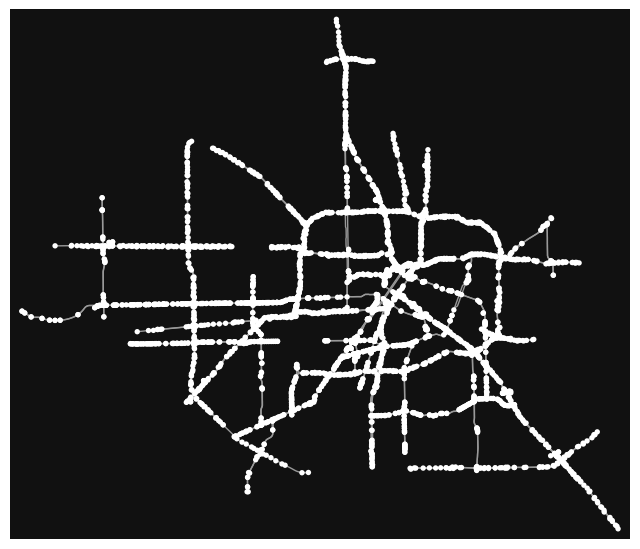

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [67]:
import osmnx as ox

# Define the area
place = "Houston, USA"  # replace with your city and country

# Define the filter
custom_filter = '["highway"~"motorway|trunk|primary"]'

# Download the road network
G = ox.graph_from_place(place, network_type='drive', custom_filter=custom_filter)

# Plot the road network
ox.plot_graph(G)

In [69]:
from shapely.geometry import box

In [70]:
# Load the shapefile and reproject it to EPSG:4326
gdf_faults = gpd.read_file('../data/faults/texas_faults_fromDor/texas_faults.shp')
gdf_faults = gdf_faults.to_crs('EPSG:4326')

# Load the second shapefile and reproject it to EPSG:4326

shapefile = gpd.read_file('../data/rivers_NHD/Shape/NHDFlowline.shp')
shapefile[shapefile['gnis_name']!='Buffalo Bayou 3452']
geodf_buffaloBayou = shapefile[shapefile['gnis_name']=='Buffalo Bayou']
geodf_buffaloBayou.to_crs('EPSG:4326')

# Load the TIFF
with rasterio.open('../data/output_rem_data/v3/buffaloBayouRegionalV1_USGS10m_REM.tif') as src:
    # Calculate the transform and the dimensions for the new CRS
    transform, width, height = calculate_default_transform(src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)

    # Create a new raster for the reprojected TIFF
    with rasterio.open('reprojected.tif', 'w', driver='GTiff', height=height, width=width, count=1, dtype=src.dtypes[0], crs='EPSG:4326', transform=transform) as reprojected:
        # Reproject the TIFF to EPSG:4326
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(reprojected, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs='EPSG:4326',
            resampling=Resampling.nearest)

# Load the reprojected TIFF
with rasterio.open('reprojected.tif') as reprojected:
    img = reprojected.read(1)

    # Clip the reprojected shapefile to the extent of the reprojected TIFF
    gdf_faults = gdf_faults.cx[reprojected.bounds.left:reprojected.bounds.right, reprojected.bounds.bottom:reprojected.bounds.top]
    geodf_buffaloBayou = geodf_buffaloBayou.cx[reprojected.bounds.left:reprojected.bounds.right, reprojected.bounds.bottom:reprojected.bounds.top]


# Get the bounds from the reprojected GeoDataFrame
bounds = reprojected.bounds

# Create a bounding box from the bounds
bbox = gpd.GeoDataFrame({'geometry': [box(*bounds)]}, crs=reprojected.crs)
# Reproject the bounding box to WGS84 (the CRS used by OpenStreetMap)
bbox = bbox.to_crs(epsg=4326)

# Get the bounding box coordinates
north, south, east, west = bbox.total_bounds

# Define the filter
custom_filter = '["highway"~"motorway|trunk|primary"]'

# Download the road network
G = ox.graph_from_bbox(north, south, east, west, network_type='drive', custom_filter=custom_filter)

# Convert the road network to a GeoDataFrame
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# Plot the reprojected TIFF
fig, ax = plt.subplots(1, 1, figsize=(20, 20))  # Adjust the size as needed
show(img, ax=ax, transform=transform)


# Overlay the road network
edges.plot(ax=ax, color='gray', linewidth=0.7)  # Adjust color and linewidth as needed

# Overlay the reprojected and clipped shapefile
gdf_faults.plot(ax=ax, color='red', edgecolor='red', linewidth=0.8)
geodf_buffaloBayou.plot(ax=ax, color='white', edgecolor='white', linewidth=1.25)


plt.show()